In [1]:
#basics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#text process
import nltk
import unidecode
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Processamento dos dados

Como existem dados textuais podemos usar as funções já utilizadas no trabalho anterior




In [2]:
with open('./data/train.csv', encoding="utf8") as file:
    df = pd.read_csv(file)
    
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Limpeza dos textos dos tweets

Um coisa interessante de se pensar é que os dados textuais se dão através de textos escritos por pessoas em sua rede social tweeter e podem existir erros de digitação assim é importante tentar corrigir as palavras mal escritas. Para isso podemos usar a biblioteca spell checker.

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/igor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/igor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/igor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/igor/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Reutilizando funções do trabalho prático

In [4]:
def remove_specials(tokens):
    return [unidecode.unidecode(word) for word in tokens]

def remove_punctuation(tokens):
    table = str.maketrans("","",string.punctuation)
    return [w.translate(table) for w in tokens]

def array_lower(tokens):
    return [w.lower() for w in tokens]

def remove_no_words(tokens):
    return [word for word in tokens if word.isalpha()]

def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [w for w in tokens if not w in stop_words]

def text_clean(df_text_column, log=False):
    if log: print("Starting")

    # Dividindo texto em tokens
    df_text_column = df_text_column.apply(word_tokenize)

    if log: print("Tokens split done")  # Some log

    # Convertendo texto para minusculo
    df_text_column = df_text_column.apply(array_lower)

    if log: print("Upper letters converted to normal")

    # Removendo pontuação
    df_text_column = df_text_column.apply(remove_punctuation)

    if log: print("Removed punctiation")

    # Removendo caracteres especiais
    df_text_column = df_text_column.apply(remove_specials)

    if log: print("Specials chars removed")

    # Removendo tokens que não sao palavras
    df_text_column = df_text_column.apply(remove_no_words)

    if log: print("Removed non-words tokens")

    # Removendo tokens que são stop words
    df_text_column = df_text_column.apply(remove_stop_words)

    if log: print("Removed tokens that are stop-words\nFinished")

    return df_text_column

In [5]:
df_train = df.copy()

df_train['text'] = text_clean(df_train['text'],log=True)

Starting
Tokens split done
Upper letters converted to normal
Removed punctiation
Specials chars removed
Removed non-words tokens
Removed tokens that are stop-words
Finished


In [6]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


In [7]:
# Lemmização

wordnet_lemmatizer = WordNetLemmatizer()
lemmazation = lambda words: [wordnet_lemmatizer.lemmatize(tk) for tk in words]
df_train['text'] = df_train['text'].apply(lemmazation)

In [8]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deed, reason, earthquake, may, allah, forgive...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[resident, asked, shelter, place, notified, of...",1
3,6,NaN,NaN,"[people, receive, wildfire, evacuation, order,...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

do_nothing = lambda x: x
vect_manual = TfidfVectorizer(tokenizer=do_nothing, lowercase=False, preprocessor=do_nothing, ngram_range=(1, 2),min_df=10,max_df=0.95)
freq = vect_manual.fit_transform(df_train['text'].values.tolist())
features = vect_manual.get_feature_names_out()
df_freq = pd.DataFrame(data=freq.todense(), columns=features)
df_freq.head()

,aba,aba woman,abandoned,abc,abc news,ablaze,able,absolutely,accident,accident http,...,york,young,youth,youth saved,youtube,youtube playlist,youtube video,yr,yyc,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Analise exploratoria de cada classe

Os dados possuem 2 classes são elas:

0 - Tweets sobre desastres que são fake (Não Desastre)

1 - Tweets sobre desastres que são reais (Desastre)

[Text(0, 0, 'Não Desastre'), Text(1, 0, 'Desastre')]

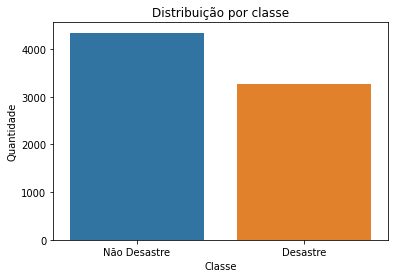

In [10]:
ax = sns.countplot(x='target',data = df)

ax.set_title('Distribuição por classe')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Classe')
ax.set_xticklabels(["Não Desastre","Desastre"])

Podemos comparar algumas caracteristicas do texto, como tamanho do texto e a quantidade de tokens geradas por cada.

Text(0.5, 1.05, 'Distribuição da quantidade de caracteres do tweet por classe')

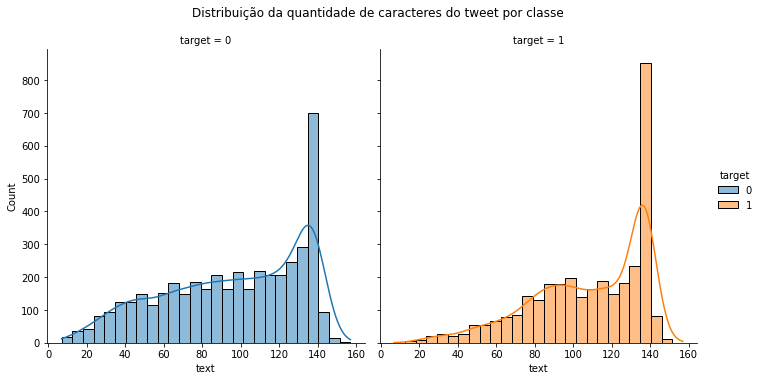

In [11]:
ax = sns.displot(x=df['text'].str.len(),data = df,col='target',hue='target',kde=True)

ax.fig.suptitle('Distribuição da quantidade de caracteres do tweet por classe',y=1.05)

Text(0.5, 1.05, 'Distribuição da quantidade de tokens do tweet por classe')

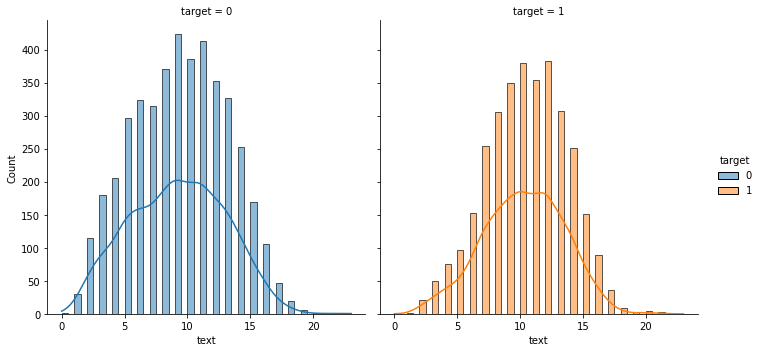

In [12]:
sns.displot(x=df_train['text'].str.len(),data = df,col='target',hue='target',kde=True)
ax.fig.suptitle('Distribuição da quantidade de tokens do tweet por classe',y=1.05)

Text(0, 0.5, 'Variancia explicada')

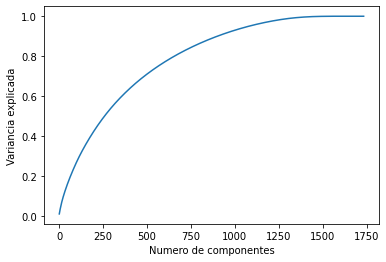

In [13]:
from sklearn.decomposition import TruncatedSVD, PCA

pca = PCA().fit(df_freq)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('Variancia explicada')

In [14]:
N_COMPONENTS = 1000
pca = TruncatedSVD(n_components=N_COMPONENTS)
pca.fit(df_freq)
print(f"Total variance explained: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")

Total variance explained: 92.84%


In [15]:
freq_reduced = pca.transform(df_freq)
N_COMPONENTS = freq_reduced.shape[1]
df_freq_reduced = pd.DataFrame(data=freq_reduced, columns=list(range(N_COMPONENTS)))
df_freq_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.058276,0.088541,-0.021756,-0.065794,0.037466,0.324250,0.053649,0.013406,-0.085851,-0.071950,...,-0.015701,-0.005453,0.017313,-0.001647,-0.000471,0.008333,0.002680,-0.011334,-0.009645,0.007286
1,0.049963,0.078250,0.326876,0.094827,0.003299,0.033676,-0.057919,-0.076987,0.024118,-0.088398,...,0.039406,0.026766,0.004482,0.014336,-0.032966,-0.026997,-0.006503,0.042624,-0.022805,-0.016342
2,0.019506,0.016901,0.007477,-0.005852,0.009997,-0.017254,0.007266,-0.019349,-0.018089,-0.000559,...,-0.010560,0.009834,0.027732,-0.040028,0.014939,0.038647,-0.021133,0.005196,0.018710,-0.023305
3,0.053702,0.033352,0.087594,0.021270,0.013554,-0.026120,0.042711,-0.073846,-0.081039,0.064647,...,0.026772,0.011890,0.002644,-0.011345,-0.011375,0.004559,-0.002996,0.022770,-0.036208,-0.000173
4,0.039933,0.056045,0.027208,0.005658,-0.005615,-0.003992,0.011396,-0.028393,-0.018994,0.051436,...,-0.008733,-0.024895,0.010959,0.013316,-0.014650,-0.031496,0.009858,-0.019144,-0.005750,0.000541


# Classificadores

## Pipeline cria um pipeline para um classificador

## Knn

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [3,5,7,11,13]}

clf = GridSearchCV(KNeighborsClassifier(), params, n_jobs = -1)
clf.fit(df_freq_reduced, df['target'])

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 11, 13]})

In [17]:
clf.best_params_

{'n_neighbors': 3}

## Testset

In [18]:
with open('./data/test.csv', encoding="utf8") as file:
    df_test = pd.read_csv(file)
    
df_test['text'] = text_clean(df_test['text'])
df_test['text'] = df_test['text'].apply(lemmazation)

freq_test = vect_manual.fit_transform(df_test['text'].values.tolist())
features_test = vect_manual.get_feature_names_out()
df_freq_test = pd.DataFrame(data=freq_test.todense(), columns=features_test)
df_freq_test.head()

,abc,ablaze,accident,account,actually,affected,aftershock,ago,air,airplane,...,wreckage,wrecked,yeah,year,yes,yesterday,yet,youtube,youtube video,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create dataset with all samples

In [31]:
# Load target from testset
with open('./data/sample_submission.csv', encoding="utf8") as file:
    target_test = pd.read_csv(file)

with open('./data/test.csv', encoding="utf8") as file:
    df_raw_test = pd.read_csv(file)

with open('./data/train.csv', encoding="utf8") as file:
    df_raw_train = pd.read_csv(file)

In [32]:
# Unify the target of the test with test_set
df_raw_test['target'] = target_test['target']
df_raw_test.head()

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",0
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,0


In [34]:
# Concat the train and test data
df_dataset = pd.concat([df_raw_train, df_raw_test])
print(f"Dataset Shape: train ({df_raw_train.shape[0]}) + test ({df_raw_test.shape[0]}) = total ({df_dataset.shape[0]})")

Dataset Shape: train (7613) + test (3263) = total (10876)


In [37]:
# Save dataset as csv
df_dataset = df_dataset.sort_values(by=['id'])
df_dataset.to_csv('./data/dataset.csv', index=False)
del df_raw_train, df_raw_test

## Pipeline

In [26]:
# Analyse train_set and test_set
print(f"Trainset:\nSamples={df_freq.shape[0]}, Features:{df_freq.shape[1]}")
print(f"Testset:\nSamples={df_freq_test.shape[0]}, Features:{df_freq_test.shape[1]}")

Trainset:
Samples=7613, Features:1734
Testset:
Samples=3263, Features:753


In [19]:
# Create cache diretctory
import os
if not os.path.exists("./cache"):
    os.mkdir("./cache")

In [23]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[('pca', PCA()), ('knn', KNeighborsClassifier(n_neighbors=3))])
print(pipe)

Pipeline(steps=[('pca', PCA()), ('knn', KNeighborsClassifier(n_neighbors=3))])


In [24]:
pipe.fit(df_freq, df['target'])
pipe.score(df_freq_test, target_test['target'])

/home/igor/Área de Trabalho/UFES/6 Período-EART/Data Science/TP/datascience_env/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- annihilation salt
- continue
- eat
- forest stop
- local
- ...
Feature names seen at fit time, yet now missing:
- aba
- aba woman
- abandoned
- abc news
- able
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 753 features, but PCA is expecting 1734 features as input.

In [ ]:
df_test.shape